In [17]:

!git clone https://github.com/shining0611armor/Implementation-of-a-Denoising-Diffusion-Probabilistic-Model-DDPM-.git

%cd Implementation-of-a-Denoising-Diffusion-Probabilistic-Model-DDPM-/Mnist_implementation_files/


Cloning into 'Implementation-of-a-Denoising-Diffusion-Probabilistic-Model-DDPM-'...
remote: Enumerating objects: 48, done.
remote: Counting objects: 100% (48/48), done.
remote: Compressing objects: 100% (45/45), done.
remote: Total 48 (delta 12), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (48/48), 22.82 KiB | 4.56 MiB/s, done.
Resolving deltas: 100% (12/12), done.
/content/Implementation-of-a-Denoising-Diffusion-Probabilistic-Model-DDPM-/Mnist_implementation_files/Implementation-of-a-Denoising-Diffusion-Probabilistic-Model-DDPM-/Mnist_implementation_files/Implementation-of-a-Denoising-Diffusion-Probabilistic-Model-DDPM-/Mnist_implementation_files


In [2]:
ls

Dataset.py  diffusion_model.py  main.py  requirement.txt  unet.py  utils.py


In [3]:
!pip3 install -r requirement.txt

import os

assert os.path.exists("main.py"), "main.py not found"
assert os.path.exists("Dataset.py"), "Dataset.py not found"
assert os.path.exists("utils.py"), "utils.py not found"
assert os.path.exists("diffusion_model.py"), "diffusion_model.py not found"
assert os.path.exists("unet.py"), "unet.py not found"
assert os.path.exists("requirement.txt"), "requirement.txt not found"



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.2/43.2 kB 2.6 MB/s eta 0:00:00


In [4]:
from Dataset import get_data_loaders
from utils import *
import utils


In [ ]:
!python3 main.py

from IPython.display import Image, display
display(Image(filename="train_images.png"))
display(Image(filename="test_images.png"))
print("samples of dataset images are saved successfully!")


In [6]:
from diffusion_model import *


Using device: cuda	Tesla T4


In [ ]:

import torch
import torch.nn as nn
import matplotlib.pyplot as plt

# Define a dummy backward process model for illustration purposes
class BackwardProcessModel(nn.Module):
    def __init__(self):
        super(BackwardProcessModel, self).__init__()

    def forward(self, x, t):
        pass

device = "cuda" if torch.cuda.is_available() else "cpu"

train_loader, test_loader = get_data_loaders(batch_size=128)

backward_model = BackwardProcessModel().to(device)
diffusion_model = DiffusionModel(backward_model, beta_start=0.0001, beta_end=0.02, timesteps=1000, device=device).to(device)

for batch_idx, (data, target) in enumerate(train_loader):
    data = data.to(device)
    timesteps_to_visualize = [0, 25, 50, 75, 100, 150, 200, 500, 750, 999]
    fig, axes = plt.subplots(1, len(timesteps_to_visualize), figsize=(15, 3))

    for i, timestep in enumerate(timesteps_to_visualize):
        x_t, noise = diffusion_model.add_noise(data, timestep, visualization=True)
        ax = axes[i]
        ax.imshow(x_t[0].cpu().detach().numpy().squeeze(), cmap='gray')
        ax.set_title(f"Timestep {timestep}")
        ax.axis('off')

    plt.show()
    break

print("Visualization complete!")

In [8]:
from unet import sinusoidal_embedding, MyUNet

n_steps, beta_start, beta_end = 1000, 10 ** -4, 0.02  # Originally used by the authors

ddpm = DiffusionModel( MyUNet(n_steps), beta_start, beta_end, n_steps, device="cuda").to(device)
print(sum([p.numel() for p in ddpm.parameters()]))

606852


In [ ]:
from diffusion_model import sample
from utils import show_images

print("Generating new images")
generated = sample(ddpm, gif_name="before_training.gif")
show_images(generated, "Images generated before training")

Training progress:   0%|          | 0/60 [00:00<?, ?it/s]

Epoch 1/60 - Training:   0%|          | 0/469 [00:00<?, ?it/s]

Epoch 1/60 - Validation:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 1/60 - Training Loss: 0.044, Validation Loss: 0.036, Learning Rate: 0.001000 --> saving best model


Epoch 2/60 - Training:   0%|          | 0/469 [00:00<?, ?it/s]

Epoch 2/60 - Validation:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 2/60 - Training Loss: 0.036, Validation Loss: 0.036, Learning Rate: 0.001000 --> saving best model


Epoch 3/60 - Training:   0%|          | 0/469 [00:00<?, ?it/s]

Epoch 3/60 - Validation:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 3/60 - Training Loss: 0.035, Validation Loss: 0.036, Learning Rate: 0.001000 --> saving best model


Epoch 4/60 - Training:   0%|          | 0/469 [00:00<?, ?it/s]

Epoch 4/60 - Validation:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 4/60 - Training Loss: 0.034, Validation Loss: 0.033, Learning Rate: 0.001000 --> saving best model


Epoch 5/60 - Training:   0%|          | 0/469 [00:00<?, ?it/s]

Epoch 5/60 - Validation:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 5/60 - Training Loss: 0.033, Validation Loss: 0.032, Learning Rate: 0.001000 --> saving best model


Epoch 6/60 - Training:   0%|          | 0/469 [00:00<?, ?it/s]

Epoch 6/60 - Validation:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 6/60 - Training Loss: 0.033, Validation Loss: 0.032, Learning Rate: 0.001000 --> saving best model


Epoch 7/60 - Training:   0%|          | 0/469 [00:00<?, ?it/s]

Epoch 7/60 - Validation:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 7/60 - Training Loss: 0.033, Validation Loss: 0.034, Learning Rate: 0.001000 --> saving best model


Epoch 8/60 - Training:   0%|          | 0/469 [00:00<?, ?it/s]

Epoch 8/60 - Validation:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 8/60 - Training Loss: 0.032, Validation Loss: 0.032, Learning Rate: 0.001000 --> saving best model


Epoch 9/60 - Training:   0%|          | 0/469 [00:00<?, ?it/s]

Epoch 9/60 - Validation:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 9/60 - Training Loss: 0.032, Validation Loss: 0.032, Learning Rate: 0.001000 --> saving best model


Epoch 10/60 - Training:   0%|          | 0/469 [00:00<?, ?it/s]

Epoch 10/60 - Validation:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 10/60 - Training Loss: 0.031, Validation Loss: 0.030, Learning Rate: 0.000500 --> saving best model


Epoch 11/60 - Training:   0%|          | 0/469 [00:00<?, ?it/s]

Epoch 11/60 - Validation:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 11/60 - Training Loss: 0.030, Validation Loss: 0.030, Learning Rate: 0.000500 --> saving best model


Epoch 12/60 - Training:   0%|          | 0/469 [00:00<?, ?it/s]

Epoch 12/60 - Validation:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 12/60 - Training Loss: 0.030, Validation Loss: 0.029, Learning Rate: 0.000500


Epoch 13/60 - Training:   0%|          | 0/469 [00:00<?, ?it/s]

Epoch 13/60 - Validation:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 13/60 - Training Loss: 0.029, Validation Loss: 0.029, Learning Rate: 0.000500 --> saving best model


Epoch 14/60 - Training:   0%|          | 0/469 [00:00<?, ?it/s]

Epoch 14/60 - Validation:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 14/60 - Training Loss: 0.029, Validation Loss: 0.030, Learning Rate: 0.000500 --> saving best model


Epoch 15/60 - Training:   0%|          | 0/469 [00:00<?, ?it/s]

Epoch 15/60 - Validation:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 15/60 - Training Loss: 0.029, Validation Loss: 0.029, Learning Rate: 0.000500 --> saving best model


Epoch 16/60 - Training:   0%|          | 0/469 [00:00<?, ?it/s]

Epoch 16/60 - Validation:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 16/60 - Training Loss: 0.029, Validation Loss: 0.029, Learning Rate: 0.000500


Epoch 17/60 - Training:   0%|          | 0/469 [00:00<?, ?it/s]

Epoch 17/60 - Validation:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 17/60 - Training Loss: 0.029, Validation Loss: 0.029, Learning Rate: 0.000500 --> saving best model


Epoch 18/60 - Training:   0%|          | 0/469 [00:00<?, ?it/s]

Epoch 18/60 - Validation:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 18/60 - Training Loss: 0.029, Validation Loss: 0.029, Learning Rate: 0.000500 --> saving best model


Epoch 19/60 - Training:   0%|          | 0/469 [00:00<?, ?it/s]

Epoch 19/60 - Validation:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 19/60 - Training Loss: 0.029, Validation Loss: 0.029, Learning Rate: 0.000500 --> saving best model


Epoch 20/60 - Training:   0%|          | 0/469 [00:00<?, ?it/s]

Epoch 20/60 - Validation:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 20/60 - Training Loss: 0.029, Validation Loss: 0.028, Learning Rate: 0.000250 --> saving best model


Epoch 21/60 - Training:   0%|          | 0/469 [00:00<?, ?it/s]

Epoch 21/60 - Validation:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 21/60 - Training Loss: 0.028, Validation Loss: 0.028, Learning Rate: 0.000250 --> saving best model


Epoch 22/60 - Training:   0%|          | 0/469 [00:00<?, ?it/s]

Epoch 22/60 - Validation:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 22/60 - Training Loss: 0.028, Validation Loss: 0.028, Learning Rate: 0.000250


Epoch 23/60 - Training:   0%|          | 0/469 [00:00<?, ?it/s]

Epoch 23/60 - Validation:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 23/60 - Training Loss: 0.028, Validation Loss: 0.029, Learning Rate: 0.000250


Epoch 24/60 - Training:   0%|          | 0/469 [00:00<?, ?it/s]

Epoch 24/60 - Validation:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 24/60 - Training Loss: 0.028, Validation Loss: 0.028, Learning Rate: 0.000250 --> saving best model


Epoch 25/60 - Training:   0%|          | 0/469 [00:00<?, ?it/s]

Epoch 25/60 - Validation:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 25/60 - Training Loss: 0.028, Validation Loss: 0.027, Learning Rate: 0.000250


Epoch 26/60 - Training:   0%|          | 0/469 [00:00<?, ?it/s]

Epoch 26/60 - Validation:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 26/60 - Training Loss: 0.028, Validation Loss: 0.027, Learning Rate: 0.000250


Epoch 27/60 - Training:   0%|          | 0/469 [00:00<?, ?it/s]

Epoch 27/60 - Validation:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 27/60 - Training Loss: 0.027, Validation Loss: 0.027, Learning Rate: 0.000250 --> saving best model


Epoch 28/60 - Training:   0%|          | 0/469 [00:00<?, ?it/s]

Epoch 28/60 - Validation:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 28/60 - Training Loss: 0.028, Validation Loss: 0.027, Learning Rate: 0.000250


Epoch 29/60 - Training:   0%|          | 0/469 [00:00<?, ?it/s]

Epoch 29/60 - Validation:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 29/60 - Training Loss: 0.027, Validation Loss: 0.028, Learning Rate: 0.000250 --> saving best model


Epoch 30/60 - Training:   0%|          | 0/469 [00:00<?, ?it/s]

Epoch 30/60 - Validation:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 30/60 - Training Loss: 0.027, Validation Loss: 0.027, Learning Rate: 0.000125 --> saving best model


Epoch 31/60 - Training:   0%|          | 0/469 [00:00<?, ?it/s]

Epoch 31/60 - Validation:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 31/60 - Training Loss: 0.027, Validation Loss: 0.027, Learning Rate: 0.000125 --> saving best model


Epoch 32/60 - Training:   0%|          | 0/469 [00:00<?, ?it/s]

Epoch 32/60 - Validation:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 32/60 - Training Loss: 0.027, Validation Loss: 0.027, Learning Rate: 0.000125


Epoch 33/60 - Training:   0%|          | 0/469 [00:00<?, ?it/s]

Epoch 33/60 - Validation:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 33/60 - Training Loss: 0.027, Validation Loss: 0.027, Learning Rate: 0.000125 --> saving best model


Epoch 34/60 - Training:   0%|          | 0/469 [00:00<?, ?it/s]

Epoch 34/60 - Validation:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 34/60 - Training Loss: 0.027, Validation Loss: 0.027, Learning Rate: 0.000125


Epoch 35/60 - Training:   0%|          | 0/469 [00:00<?, ?it/s]

Epoch 35/60 - Validation:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 35/60 - Training Loss: 0.027, Validation Loss: 0.027, Learning Rate: 0.000125


Epoch 36/60 - Training:   0%|          | 0/469 [00:00<?, ?it/s]

Epoch 36/60 - Validation:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 36/60 - Training Loss: 0.027, Validation Loss: 0.027, Learning Rate: 0.000125


Epoch 37/60 - Training:   0%|          | 0/469 [00:00<?, ?it/s]

Epoch 37/60 - Validation:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 37/60 - Training Loss: 0.027, Validation Loss: 0.026, Learning Rate: 0.000125


Epoch 38/60 - Training:   0%|          | 0/469 [00:00<?, ?it/s]

Epoch 38/60 - Validation:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 38/60 - Training Loss: 0.027, Validation Loss: 0.027, Learning Rate: 0.000125


Epoch 39/60 - Training:   0%|          | 0/469 [00:00<?, ?it/s]

Epoch 39/60 - Validation:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 39/60 - Training Loss: 0.027, Validation Loss: 0.026, Learning Rate: 0.000125 --> saving best model


Epoch 40/60 - Training:   0%|          | 0/469 [00:00<?, ?it/s]

Epoch 40/60 - Validation:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 40/60 - Training Loss: 0.027, Validation Loss: 0.027, Learning Rate: 0.000063 --> saving best model


Epoch 41/60 - Training:   0%|          | 0/469 [00:00<?, ?it/s]

Epoch 41/60 - Validation:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 41/60 - Training Loss: 0.026, Validation Loss: 0.027, Learning Rate: 0.000063 --> saving best model


Epoch 42/60 - Training:   0%|          | 0/469 [00:00<?, ?it/s]

Epoch 42/60 - Validation:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 42/60 - Training Loss: 0.027, Validation Loss: 0.026, Learning Rate: 0.000063


Epoch 43/60 - Training:   0%|          | 0/469 [00:00<?, ?it/s]

Epoch 43/60 - Validation:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 43/60 - Training Loss: 0.027, Validation Loss: 0.027, Learning Rate: 0.000063


Epoch 44/60 - Training:   0%|          | 0/469 [00:00<?, ?it/s]

Epoch 44/60 - Validation:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 44/60 - Training Loss: 0.027, Validation Loss: 0.027, Learning Rate: 0.000063


Epoch 45/60 - Training:   0%|          | 0/469 [00:00<?, ?it/s]

Epoch 45/60 - Validation:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 45/60 - Training Loss: 0.026, Validation Loss: 0.027, Learning Rate: 0.000063 --> saving best model


Epoch 46/60 - Training:   0%|          | 0/469 [00:00<?, ?it/s]

Epoch 46/60 - Validation:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 46/60 - Training Loss: 0.027, Validation Loss: 0.026, Learning Rate: 0.000063


Epoch 47/60 - Training:   0%|          | 0/469 [00:00<?, ?it/s]

Epoch 47/60 - Validation:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 47/60 - Training Loss: 0.026, Validation Loss: 0.027, Learning Rate: 0.000063


Epoch 48/60 - Training:   0%|          | 0/469 [00:00<?, ?it/s]

Epoch 48/60 - Validation:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 48/60 - Training Loss: 0.027, Validation Loss: 0.026, Learning Rate: 0.000063


Epoch 49/60 - Training:   0%|          | 0/469 [00:00<?, ?it/s]

Epoch 49/60 - Validation:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 49/60 - Training Loss: 0.026, Validation Loss: 0.027, Learning Rate: 0.000063


Epoch 50/60 - Training:   0%|          | 0/469 [00:00<?, ?it/s]

Epoch 50/60 - Validation:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 50/60 - Training Loss: 0.027, Validation Loss: 0.027, Learning Rate: 0.000031


Epoch 51/60 - Training:   0%|          | 0/469 [00:00<?, ?it/s]

Epoch 51/60 - Validation:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 51/60 - Training Loss: 0.026, Validation Loss: 0.026, Learning Rate: 0.000031 --> saving best model


Epoch 52/60 - Training:   0%|          | 0/469 [00:00<?, ?it/s]

Epoch 52/60 - Validation:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 52/60 - Training Loss: 0.026, Validation Loss: 0.026, Learning Rate: 0.000031


Epoch 53/60 - Training:   0%|          | 0/469 [00:00<?, ?it/s]

Epoch 53/60 - Validation:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 53/60 - Training Loss: 0.026, Validation Loss: 0.026, Learning Rate: 0.000031


Epoch 54/60 - Training:   0%|          | 0/469 [00:00<?, ?it/s]

Epoch 54/60 - Validation:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 54/60 - Training Loss: 0.026, Validation Loss: 0.027, Learning Rate: 0.000031 --> saving best model


Epoch 55/60 - Training:   0%|          | 0/469 [00:00<?, ?it/s]

Epoch 55/60 - Validation:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 55/60 - Training Loss: 0.026, Validation Loss: 0.026, Learning Rate: 0.000031 --> saving best model


Epoch 56/60 - Training:   0%|          | 0/469 [00:00<?, ?it/s]

Epoch 56/60 - Validation:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 56/60 - Training Loss: 0.026, Validation Loss: 0.027, Learning Rate: 0.000031 --> saving best model


Epoch 57/60 - Training:   0%|          | 0/469 [00:00<?, ?it/s]

Epoch 57/60 - Validation:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 57/60 - Training Loss: 0.026, Validation Loss: 0.027, Learning Rate: 0.000031


Epoch 58/60 - Training:   0%|          | 0/469 [00:00<?, ?it/s]

Epoch 58/60 - Validation:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 58/60 - Training Loss: 0.026, Validation Loss: 0.026, Learning Rate: 0.000031 --> saving best model


Epoch 59/60 - Training:   0%|          | 0/469 [00:00<?, ?it/s]

Epoch 59/60 - Validation:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 59/60 - Training Loss: 0.027, Validation Loss: 0.026, Learning Rate: 0.000031


Epoch 60/60 - Training:   0%|          | 0/469 [00:00<?, ?it/s]

Epoch 60/60 - Validation:   0%|          | 0/79 [00:00<?, ?it/s]

Epoch 60/60 - Training Loss: 0.026, Validation Loss: 0.026, Learning Rate: 0.000016


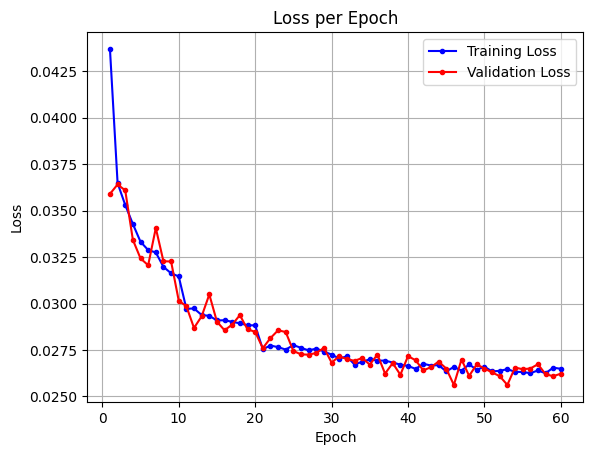

In [ ]:
from diffusion_model import training_loop
optim = Adam(ddpm.parameters(), lr=0.001)
epoch_losses = training_loop(ddpm, train_loader,test_loader, 60, optim, device, store_path="ddpm_mnist.pt")


In [13]:
# Loading the trained model
best_model = DiffusionModel( MyUNet(n_steps), beta_start, beta_end, n_steps, device="cuda").to(device)
best_model.load_state_dict(torch.load("ddpm_mnist.pt", map_location=device))
best_model.eval()
print("Model loaded")

Model loaded


In [14]:
# Evaluate the model
test_loss = evaluate(best_model, test_loader, device=device)
print(f"Test Loss: {test_loss:.4f}")

Test Loss: 0.0258


Generating new images


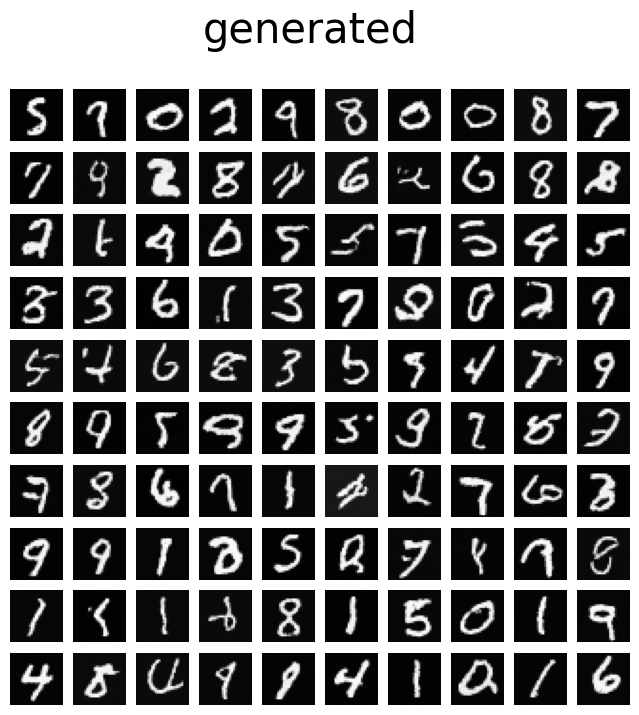

In [15]:
print("Generating new images")
generated = sample(
        best_model,
        n_samples=100,
        device=device,
        gif_name= "mnist.gif"
    )
show_images2(generated, "generated")

In [ ]:
from IPython.display import Image

Image(open( 'mnist.gif','rb').read())